In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Data Preparation

In [3]:
df = pd.read_csv(r'C:\Users\alvan\Downloads\diabetes_klasifikasi.csv')

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploratory Data Analysis

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
def plot_null(df):
  plt.figure(figsize=(20,5))
  ax = sns.barplot(x=df.isna().sum().sort_values().index, 
                   y=df.isna().sum().sort_values().values)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.bar_label(ax.containers[0])
  plt.show()

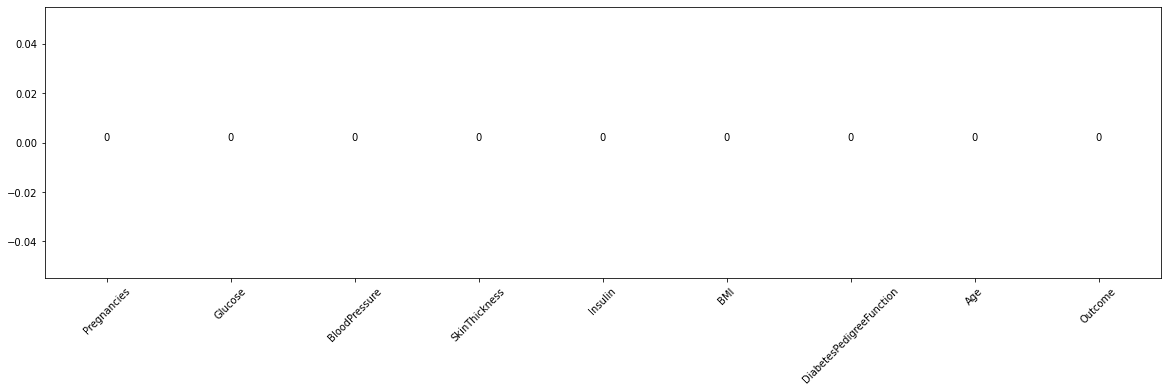

In [8]:
plot_null(df)

In [9]:
df.duplicated().sum()

0

In [10]:
df.iloc[:,:-1].duplicated().sum()

0

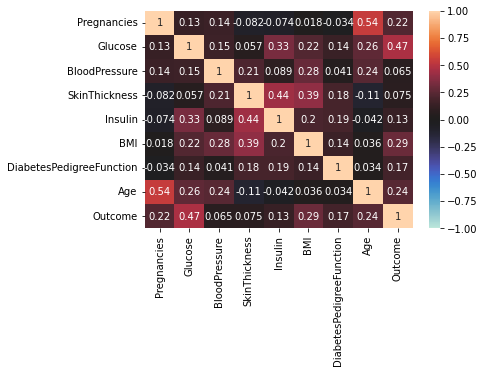

In [11]:
sns.heatmap(df.corr(), vmin=-1, center=0, vmax=1, annot=True)
plt.show()

## Unique and Count Values

In [12]:
for i in df.columns:
    print(df.loc[:,i].value_counts())
    print('============================ \n')

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Univariate Analysis

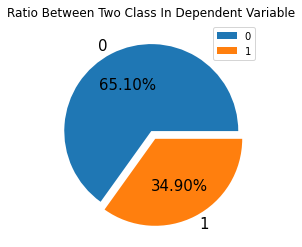

In [14]:
plt.pie(x=df['Outcome'].value_counts().values, labels=df['Outcome'].value_counts().index, 
        explode=(0,0.1), autopct='%1.2f%%', textprops={'fontsize':15})
plt.title('Ratio Between Two Class In Dependent Variable')
plt.legend(loc='upper right')
plt.show()

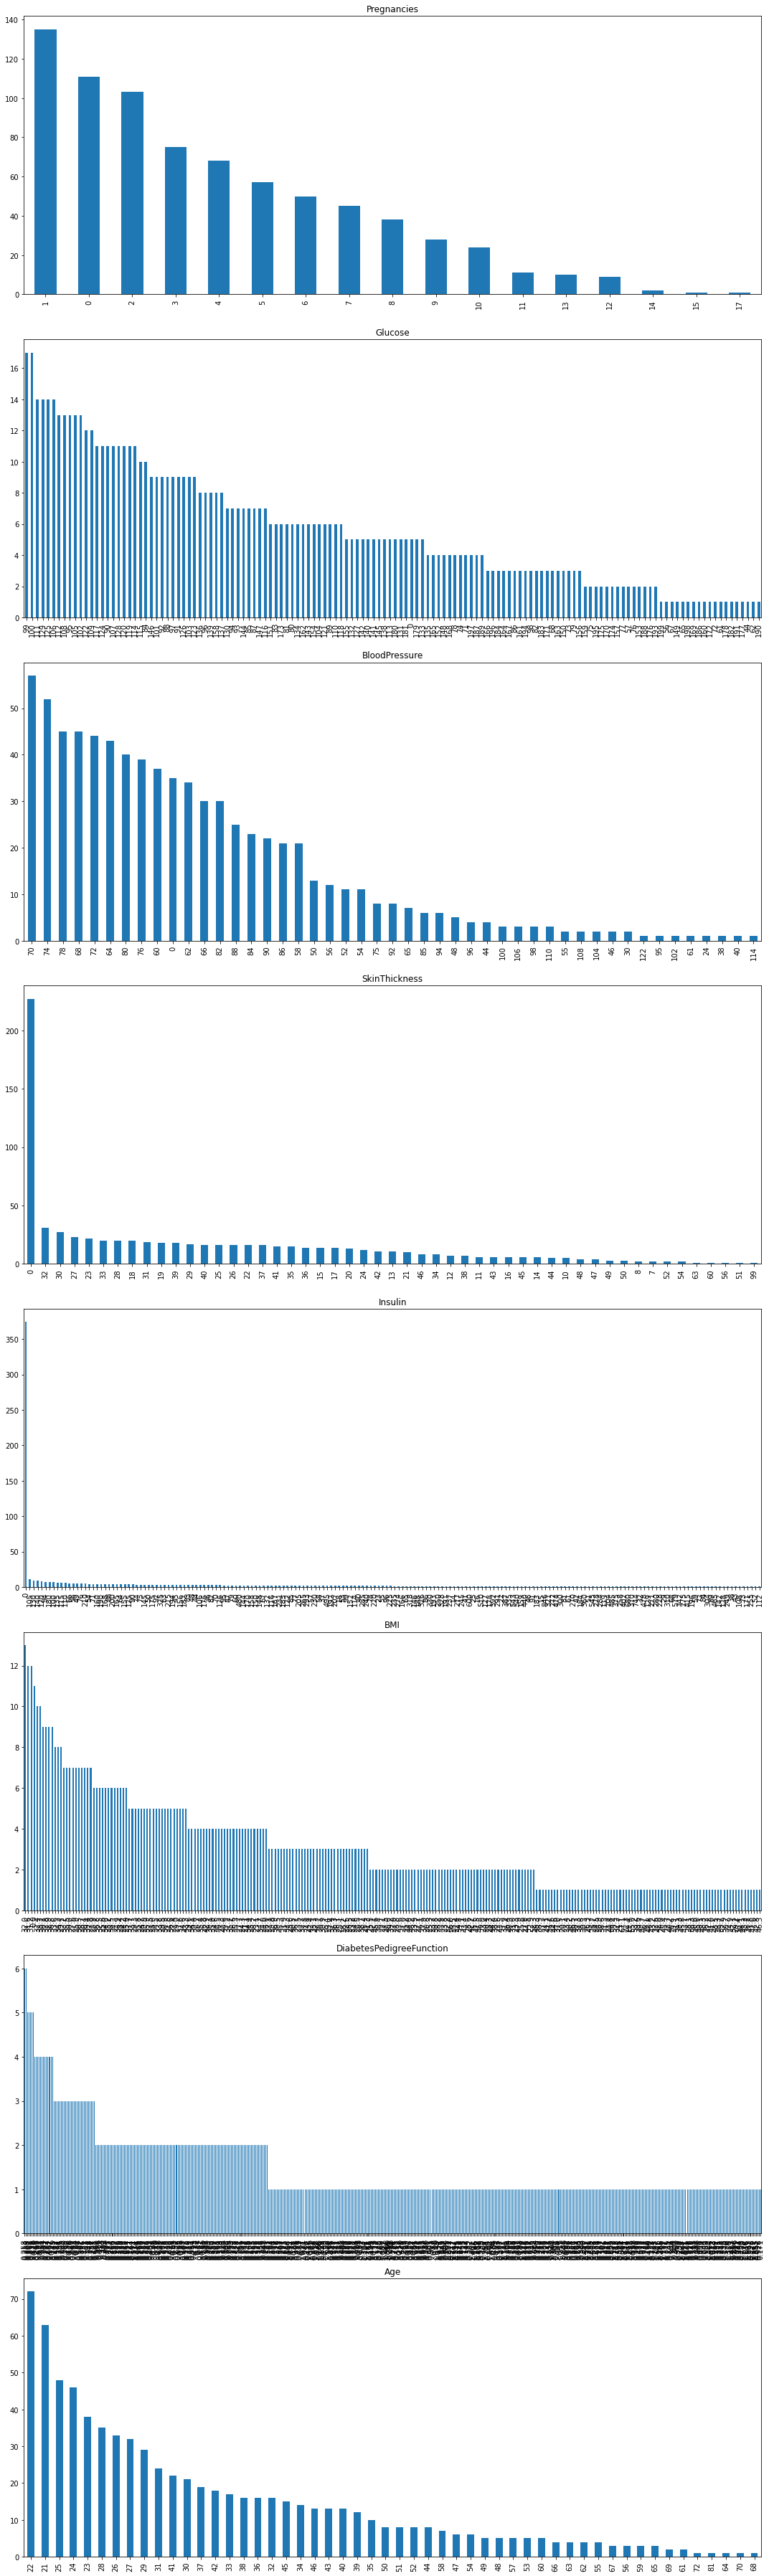

In [15]:
fig, ax = plt.subplots(8,1, figsize=(15,50))
columns = df.iloc[:,:-1].columns

for i, ax in zip(range(len(columns)), ax.flat):
    df[columns[i]].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(columns[i])
    
plt.tight_layout()
plt.show()

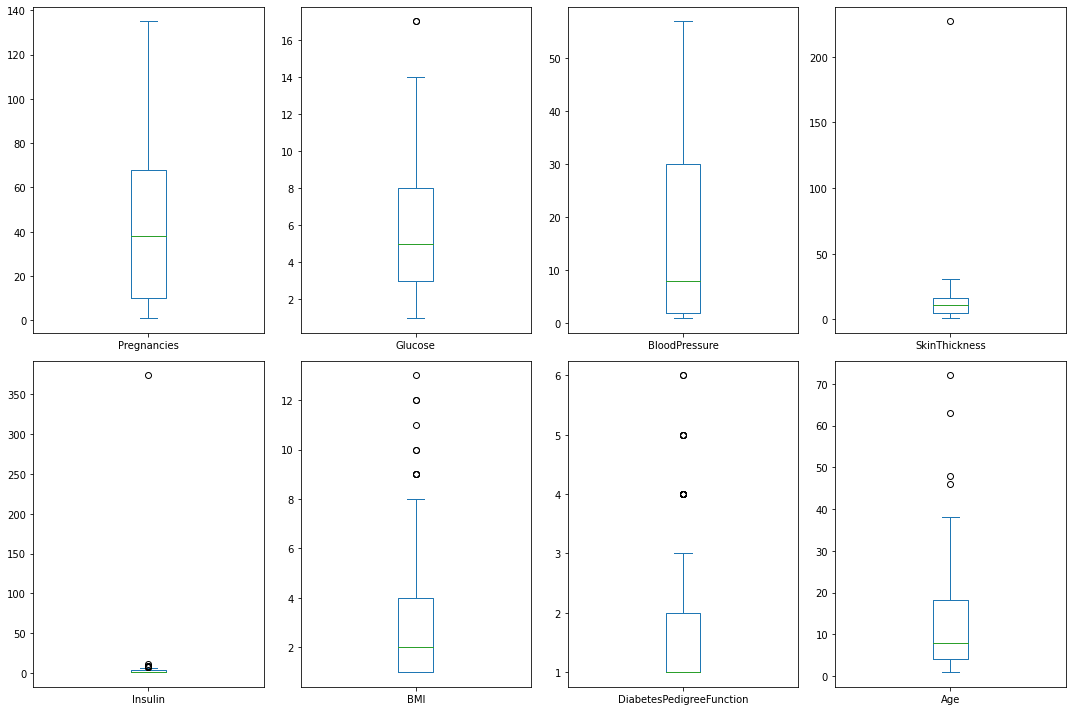

In [16]:
fig, ax = plt.subplots(2,4, figsize=(15,10))
columns = df.iloc[:,:-1].columns

for i,ax in zip(range(len(columns)), ax.flat):
    df[columns[i]].value_counts().plot(kind='box', ax=ax)
    
plt.tight_layout()
plt.show()

## Multivariate Analysis

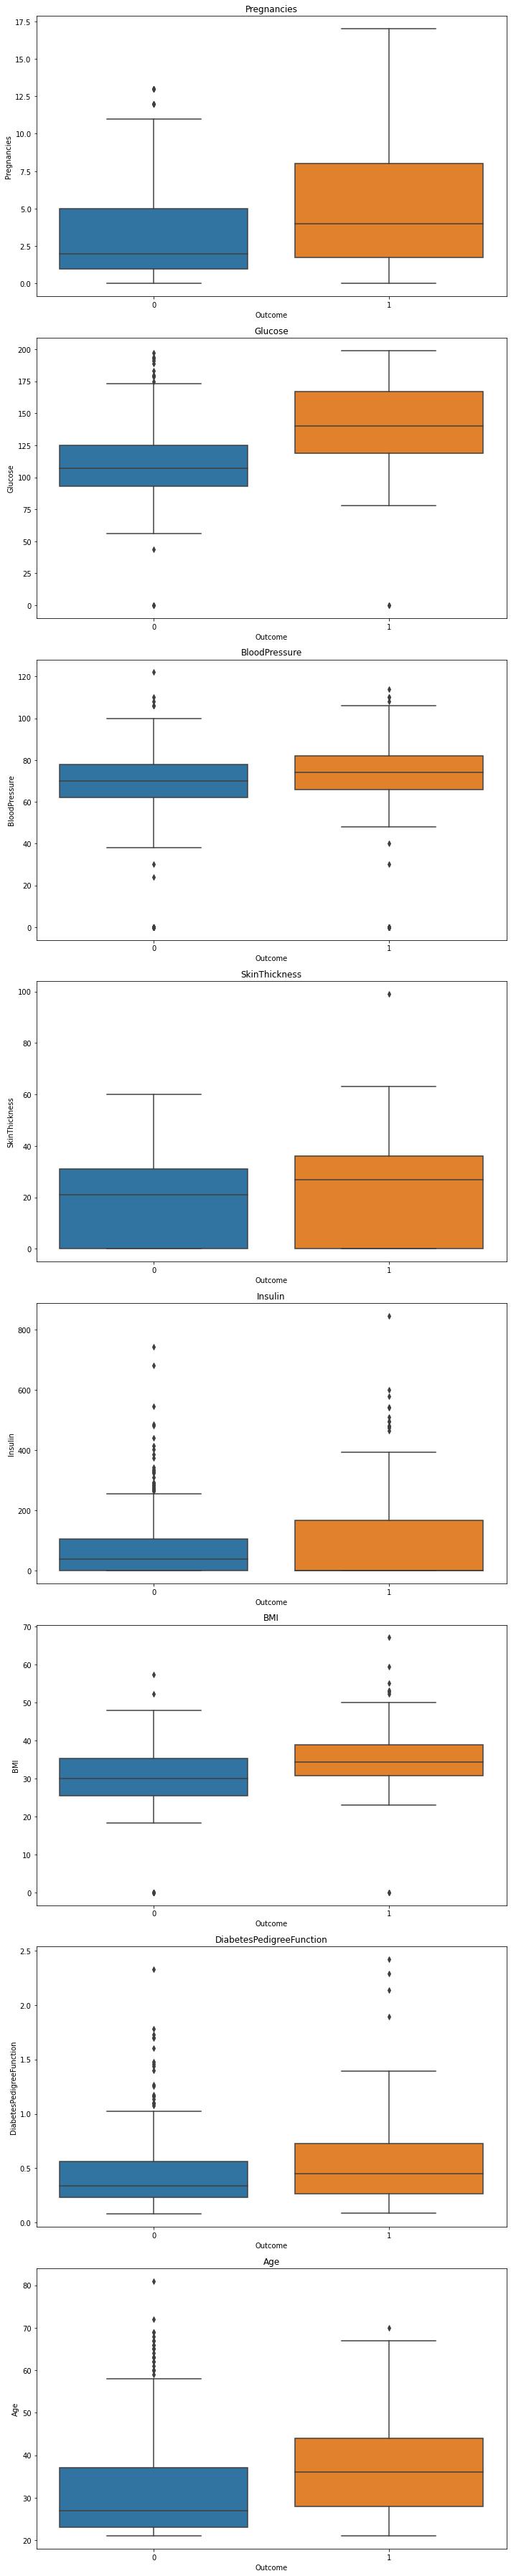

In [17]:
fig, axs = plt.subplots(8,1, figsize=(10,50))
columns = df.iloc[:,:-1].columns

for i, ax in zip(range(len(columns)), axs.flat):
    sns.boxplot(x='Outcome', y=columns[i], data=df, ax=ax)
    ax.set_title(columns[i])
    
plt.tight_layout()
plt.show()

# Data Cleaning

## Handle Data Outlier

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
columns = df.iloc[:,:-1].columns
for col in columns:
    iqr = df.loc[:, col].quantile(.75) - df.loc[:, col].quantile(.25)
    upper_bound = df.loc[:, col].quantile(.75) + 1.5*iqr

    df.loc[df[col]>upper_bound, col] = upper_bound

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,120.894531,69.06250,20.511719,73.652669,31.933854,0.458914,33.199870,0.348958
std,3.344157,31.972618,19.26109,15.844744,93.576029,7.707488,0.285596,11.628404,0.476951
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.00000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.00000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.00000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.00000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


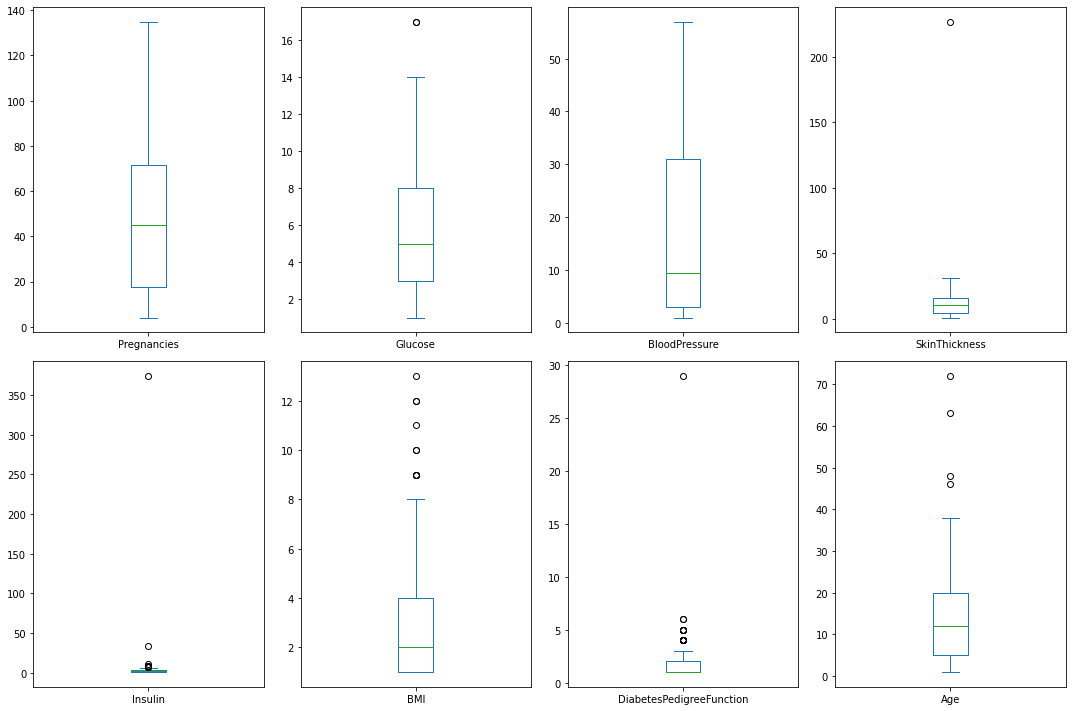

In [21]:
fig, ax = plt.subplots(2,4, figsize=(15,10))
columns = df.iloc[:,:-1].columns

for i,ax in zip(range(len(columns)), ax.flat):
    df[columns[i]].value_counts().plot(kind='box', ax=ax)
    
plt.tight_layout()
plt.show()

# Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((652, 8), (116, 8), (652,), (116,))

In [24]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled

array([[-0.24514444,  1.28431466, -0.9162586 , ...,  0.7032213 ,
         0.68199471, -0.78045963],
       [ 0.05417049, -0.33807828, -0.16837266, ...,  0.00441858,
         0.04893883, -0.33835739],
       [-0.54445938, -0.9308757 , -0.38205436, ..., -0.60208945,
         0.23780633, -0.95730052],
       ...,
       [ 1.85006011, -0.61887706,  0.90003584, ...,  1.81075769,
         2.37480712,  0.45742664],
       [-1.14308925,  0.62911751, -3.69412069, ...,  1.38883907,
        -0.88140849, -0.33835739],
       [-1.14308925,  0.12991968,  1.43424008, ..., -1.23496738,
        -0.68204835, -1.04572097]])

# LVQ

In [25]:
from sklearn.metrics import euclidean_distances
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np

class LVQ(BaseEstimator, ClassifierMixin):

    def __init__(self, alpha=1e-1, dec_alpha=.5, min_alpha=1e-25, input_size=8, 
                 n_classes=2, epochs=20):
        self.min_alpha = min_alpha
        self.weights_ = np.array([])
        self.input_size_ = input_size
        self.n_classes_ = n_classes
        self.alpha = alpha
        self.dec_alpha = dec_alpha
        self.epochs = epochs
        
        if self.alpha < self.min_alpha:
            raise Exception('alpha harus > min_alpha !')
    
    def get_params(self, deep=True):
        return {'alpha': self.alpha, 
                'dec_alpha': self.dec_alpha,
                'min_alpha': self.min_alpha,
                'input_size': self.input_size_,
                'n_classes': self.n_classes_,
                'epochs': self.epochs}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def winner(self, sample):
        distance0 = euclidean_distances(sample.reshape(1,-1), self.weights_[0:1])
        distance1 = euclidean_distances(sample.reshape(1,-1), self.weights_[1:])

        if distance0[0,0] < distance1[0,0]:
            return 0
        else:
            return 1

    def fit(self, X, y, verbose=1):

        X, y = check_X_y(X, y)

        if self.weights_.size == 0:
            idx = np.random.randint(len(X), size=self.n_classes_)
            self.weights_ = X[idx]
        else:
            None

        for epoch in (tqdm(range(self.epochs)) if verbose == 1 else range(self.epochs)):
            if verbose == 2:
                print('Start Epoch {}'.format(epoch+1))
                print('=============================')
    
            elif verbose == 3:
                print('Start Epoch {}'.format(epoch+1))
                print('Weights on start epoch {0}: {1}'.format(epoch+1, self.weights_))
                print('=============================')
            else:
                None

            for i in range(len(X)):
                pred = self.winner(X[i])
                actual = y[i]
                if actual == pred:
                    for j in range(self.input_size_):
                        self.weights_[pred, j] = self.weights_[pred, j] + self.alpha * (X[i, j] - self.weights_[pred, j])
                else:
                    for j in range(self.input_size_):
                        self.weights_[pred, j] = self.weights_[pred, j] - self.alpha * (X[i, j] - self.weights_[pred, j])

            if self.alpha >= self.min_alpha:
                update_alpha = self.alpha * self.dec_alpha
                if self.min_alpha < update_alpha:
                    self.alpha = update_alpha 
                else:
                    if verbose > 0:
                        print('=======================')
                        print('Alpha minimal tercapai!')
                        print('=======================')
                    
                    return self
                
        return self
    
    def predict(self, X):

        check_is_fitted(self)
        X = check_array(X)

        prediction = np.array([])
        for sample in X:
            prediction = np.append(prediction, self.winner(sample))
        return prediction

# LVQ-GA

In [26]:
from sklearn.metrics import accuracy_score

class LVQ_GA(LVQ, BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1e-1, dec_alpha=.5, min_alpha=1e-25, input_size=8, 
                 n_classes=2, lvq_epochs=20, num_generations=50, sol_per_pop=100,
                 cr=.9, pc=.9, pm=.5):
        self.num_generations = num_generations
        self.sol_per_pop = sol_per_pop
        self.cr = cr
        self.pc = pc
        self.pm = pm
        self.population = np.array([])
        self.fitness = np.array([])
        self.reset_alpha = alpha
        LVQ.__init__(self, alpha, dec_alpha, min_alpha, input_size, n_classes,
                     lvq_epochs)
    
    def get_params(self, deep=False):
        params = LVQ.get_params(self)
        params['num_generations'] = self.num_generations
        params['sol_per_pop'] = self.sol_per_pop
        params['cr'] = self.cr
        params['pc'] = self.pc
        params['pm'] = self.pm
        params['population'] = self.population

        return params
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def create_pop(self, X, y):
        data_0 = X[y == 0]
        data_1 = X[y == 1]
        idx_0 = np.random.randint(0, len(data_0), self.sol_per_pop)
        idx_1 = np.random.randint(0, len(data_1), self.sol_per_pop)
        pop = []
        for i in range(self.sol_per_pop):
            pop.append([data_0[idx_0[i]],data_1[idx_1[i]]])
        
        self.population = np.array(pop)
        
        return self

    """def create_pop(self):
        pop = []
        for i in range(self.sol_per_pop):
            ind = np.random.uniform(-1, 1, (self.n_classes_, self.input_size_))
            pop.append(ind)

        self.population = np.array(pop)
        return self"""

    def parent_random_selection(self):
        position = np.random.permutation(self.population.shape[0])
        parents = copy.deepcopy(self.population[position[:2]])

        return parents

    def parent_tour_selection(self, K):
        parents = []
        for i in range(2):
            position = np.random.permutation(self.sol_per_pop)[:K]
            max_fitness = self.fitness[position].max()
            parent_idx = np.where(self.fitness == max_fitness)[0][0]
            parent = copy.deepcopy(self.population[parent_idx])
            parents.append(parent)

        return parents
    
    def crossover_2_point(self, p1, p2):
        ps = random.sample(range(1, p1.shape[1] - 1), 2)
        ps.append(0)
        ps.append(p1.shape[1])
        ps = sorted(ps)
        c1, c2 = copy.deepcopy(p1), copy.deepcopy(p2)
        
        for i in range(0, 3):
            if i % 2 == 0:
                continue
            c1[:,ps[i]:ps[i + 1]] = p2[:,ps[i]:ps[i + 1]]
            c2[:,ps[i]:ps[i + 1]] = p1[:,ps[i]:ps[i + 1]]

        return c1, c2
    
    def random_mutation(self, ind):
        mut = copy.deepcopy(ind)

        for i in range(len(mut)):
            mut[i] = mut[i] + random.uniform(-1,1)*(max(mut[i]) - min(mut[i]))
        
        mut = np.array(mut)

        return mut
    
    def run_crossover_mutation(self, parents, generation):

        crossed_offspring = []
        ind1, ind2 = copy.deepcopy(parents[0]), copy.deepcopy(parents[1])
        if random.random() < self.pc:
            # Applying crossover to pair of individuals
            children = self.crossover_2_point(ind1, ind2)
            crossed_offspring.append(children[0])
            crossed_offspring.append(children[1])
        else:
            # Passing individuals further without crossover
            crossed_offspring.append(ind1)
            crossed_offspring.append(ind2)

        crossed_offspring = np.array(crossed_offspring)

        # MUTATION
        mutated = []
        for ind in crossed_offspring:
            if random.random() < self.pm:
                # Applying mutation to an individual
                mutated.append(self.random_mutation(ind))
            else:
                # Passing individual further without mutation
                mutated.append(ind)
            
        mutated = np.array(mutated)
        if generation == 0:
            self.population = np.append(self.population, mutated)\
                                        .reshape(-1, self.n_classes_, 
                                                self.input_size_)
        else:
            self.mutated = np.append(self.mutated, mutated)\
                                     .reshape(-1, self.n_classes_, 
                                              self.input_size_)
            self.population = np.append(self.population, mutated)\
                                        .reshape(-1, self.n_classes_, 
                                                self.input_size_)

        return self
    
    def run_lvq(self, X, y, weights, verbose):
        self.weights_ = copy.deepcopy(weights)
        self.alpha = self.reset_alpha
        LVQ.fit(self, X, y, verbose)
        return self
    
    def eval_fitness(self, y_true, y_pred):
        fitness = accuracy_score(y_true, y_pred)
        return fitness

    def elitism_selection(self, fitness_list, n_child):
        if self.fitness.size == 0:
            self.fitness = copy.deepcopy(fitness_list)
        else:
            self.fitness = np.append(self.fitness, fitness_list)
        idxpop_fitness_zip = list(zip(range(self.sol_per_pop+n_child), self.fitness))
        idxpop_fitness_zip = sorted(idxpop_fitness_zip, key=lambda x: x[1], reverse=True)
        self.idxpop_fitness_zip = np.array(idxpop_fitness_zip)

        idxpop_selected = self.idxpop_fitness_zip[:self.sol_per_pop, 0].astype(int)
        self.fitness = self.idxpop_fitness_zip[:self.sol_per_pop, 1]
        self.population = self.population[idxpop_selected]

        return self        

    def fit(self, X, y, val_data, lvq_verbose=1, ga_verbose=1): # ini belom
        self.create_pop(X, y)

        if val_data != None:
            X_train, X_val, y_train, y_val = X, val_data[0], y, val_data[1]
        else:
            X_train, X_val, y_train, y_val = X.copy(), X.copy(), y.copy(), y.copy()

        n_child = int(self.cr * self.sol_per_pop)
        self.best_fitness_ = 0
        self.best_weights_ = 0

        for generation in range(self.num_generations):    
            
            generation_best_fitness = 0
            
            self.mutated = np.array([])
            for i in range(int(np.floor(n_child/2))):
                if generation == 0:
                    parents = self.parent_random_selection()
                else:
                    parents = self.parent_tour_selection(5)
                self.run_crossover_mutation(parents, generation)

            fitness_list = []

            print('Generation {} Start...'.format(generation+1))
            for ind in tqdm(self.population if generation==0 else self.mutated):
                self.run_lvq(X_train, y_train, ind, lvq_verbose)
                predictions = LVQ.predict(self, X_val)
                fitness = self.eval_fitness(y_val, predictions)

                if fitness > generation_best_fitness:
                    generation_best_fitness = copy.deepcopy(fitness)
                    
                    if fitness > self.best_fitness_:
                        self.best_fitness_ = copy.deepcopy(fitness)
                        self.best_weights_ = copy.deepcopy(self.weights_)

                fitness_list.append(fitness)
            
            print('Best generation fitness:', generation_best_fitness)
            self.elitism_selection(fitness_list, n_child)
        
        print('Best fitness:', self.best_fitness_)
        self.weights_ = copy.deepcopy(self.best_weights_)

        return self
    
    def predict(self, X):
        pred = LVQ.predict(self, X)
        return pred

In [27]:
lvq_ga = LVQ_GA(alpha=.07459, dec_alpha=.1, lvq_epochs=200, 
                min_alpha=1e-10, sol_per_pop=100, 
                num_generations=3, cr=.9, pc=.9, pm=.5)
lvq_ga.fit(X_train_scaled, y_train, 
           val_data=(X_test_scaled, y_test), 
           lvq_verbose=0)

Generation 1 Start...


100%|██████████| 190/190 [02:47<00:00,  1.13it/s]


Best generation fitness: 0.7413793103448276
Generation 2 Start...


100%|██████████| 90/90 [01:21<00:00,  1.11it/s]


Best generation fitness: 0.7413793103448276
Generation 3 Start...


100%|██████████| 90/90 [01:19<00:00,  1.14it/s]

Best generation fitness: 0.7413793103448276
Best fitness: 0.7413793103448276


LVQ_GA(alpha=7.459000000000005e-10, dec_alpha=0.1, epochs=200, min_alpha=1e-10,
       num_generations=3,
       population=array([[[-8.43774314e-01, -3.69278148e-01, -1.66414455e+00, ...,
         -1.15585764e+00, -1.74904137e-01, -6.03618731e-01],
        [-1.14308925e+00, -5.72795054e-02, -3.69412069e+00, ...,
          7.03433636e-02, -1.10525145e+00, -7.80459626e-01]],

       [[-8.46354649e-01,  7.82536494e-01,...
          1.77120282e+00,  1.74850494e-01, -6.03618731e-01],
        [-8.43774314e-01, -2.44478691e-01, -2.75213507e-01, ...,
          2.28562848e-01,  3.00762161e-01, -1.04572097e+00]],

       [[-5.44459378e-01, -8.99675840e-01,  3.65831590e-01, ...,
         -1.01082311e+00,  2.59865008e+00, -4.26777835e-01],
        [-2.45144441e-01,  1.62751316e+00,  7.93194988e-01, ...,
          5.05446946e-01, -6.96038537e-01, -9.57300521e-01]]]))

In [28]:
lvq_ga = LVQ_GA(alpha=.07459, dec_alpha=.1, lvq_epochs=200, 
                min_alpha=0.0001, sol_per_pop=100, 
                num_generations=100, cr=.9, pc=.9, pm=.5)
lvq_ga.fit(X_train_scaled, y_train, 
           val_data=(X_test_scaled, y_test), 
           lvq_verbose=0)

Generation 1 Start...


100%|██████████| 190/190 [01:02<00:00,  3.05it/s]


Best generation fitness: 0.8017241379310345
Generation 2 Start...


100%|██████████| 90/90 [00:31<00:00,  2.90it/s]


Best generation fitness: 0.7931034482758621
Generation 3 Start...


100%|██████████| 90/90 [00:28<00:00,  3.16it/s]


Best generation fitness: 0.7931034482758621
Generation 4 Start...


100%|██████████| 90/90 [00:26<00:00,  3.35it/s]


Best generation fitness: 0.7844827586206896
Generation 5 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.7672413793103449
Generation 6 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.7758620689655172
Generation 7 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8017241379310345
Generation 8 Start...


100%|██████████| 90/90 [00:27<00:00,  3.30it/s]


Best generation fitness: 0.8017241379310345
Generation 9 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8017241379310345
Generation 10 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8017241379310345
Generation 11 Start...


100%|██████████| 90/90 [00:26<00:00,  3.35it/s]


Best generation fitness: 0.8017241379310345
Generation 12 Start...


100%|██████████| 90/90 [00:27<00:00,  3.28it/s]


Best generation fitness: 0.8103448275862069
Generation 13 Start...


100%|██████████| 90/90 [00:27<00:00,  3.27it/s]


Best generation fitness: 0.8103448275862069
Generation 14 Start...


100%|██████████| 90/90 [00:27<00:00,  3.30it/s]


Best generation fitness: 0.8103448275862069
Generation 15 Start...


100%|██████████| 90/90 [00:29<00:00,  3.03it/s]


Best generation fitness: 0.8103448275862069
Generation 16 Start...


100%|██████████| 90/90 [00:28<00:00,  3.20it/s]


Best generation fitness: 0.8103448275862069
Generation 17 Start...


100%|██████████| 90/90 [00:27<00:00,  3.29it/s]


Best generation fitness: 0.8103448275862069
Generation 18 Start...


100%|██████████| 90/90 [00:29<00:00,  3.09it/s]


Best generation fitness: 0.8103448275862069
Generation 19 Start...


100%|██████████| 90/90 [00:29<00:00,  3.02it/s]


Best generation fitness: 0.8103448275862069
Generation 20 Start...


100%|██████████| 90/90 [00:27<00:00,  3.27it/s]


Best generation fitness: 0.8103448275862069
Generation 21 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8103448275862069
Generation 22 Start...


100%|██████████| 90/90 [00:27<00:00,  3.30it/s]


Best generation fitness: 0.8103448275862069
Generation 23 Start...


100%|██████████| 90/90 [00:27<00:00,  3.29it/s]


Best generation fitness: 0.8103448275862069
Generation 24 Start...


100%|██████████| 90/90 [00:29<00:00,  3.07it/s]


Best generation fitness: 0.8103448275862069
Generation 25 Start...


100%|██████████| 90/90 [00:27<00:00,  3.32it/s]


Best generation fitness: 0.8103448275862069
Generation 26 Start...


100%|██████████| 90/90 [00:27<00:00,  3.33it/s]


Best generation fitness: 0.8103448275862069
Generation 27 Start...


100%|██████████| 90/90 [00:27<00:00,  3.28it/s]


Best generation fitness: 0.8103448275862069
Generation 28 Start...


100%|██████████| 90/90 [00:27<00:00,  3.31it/s]


Best generation fitness: 0.8103448275862069
Generation 29 Start...


100%|██████████| 90/90 [00:27<00:00,  3.29it/s]


Best generation fitness: 0.8103448275862069
Generation 30 Start...


100%|██████████| 90/90 [00:26<00:00,  3.34it/s]


Best generation fitness: 0.8103448275862069
Generation 31 Start...


100%|██████████| 90/90 [00:26<00:00,  3.35it/s]


Best generation fitness: 0.8103448275862069
Generation 32 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 33 Start...


100%|██████████| 90/90 [00:27<00:00,  3.27it/s]


Best generation fitness: 0.8103448275862069
Generation 34 Start...


100%|██████████| 90/90 [00:27<00:00,  3.32it/s]


Best generation fitness: 0.8103448275862069
Generation 35 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 36 Start...


100%|██████████| 90/90 [00:27<00:00,  3.29it/s]


Best generation fitness: 0.8103448275862069
Generation 37 Start...


100%|██████████| 90/90 [00:30<00:00,  2.95it/s]


Best generation fitness: 0.8103448275862069
Generation 38 Start...


100%|██████████| 90/90 [00:29<00:00,  3.10it/s]


Best generation fitness: 0.8103448275862069
Generation 39 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 40 Start...


100%|██████████| 90/90 [00:27<00:00,  3.24it/s]


Best generation fitness: 0.8103448275862069
Generation 41 Start...


100%|██████████| 90/90 [00:27<00:00,  3.29it/s]


Best generation fitness: 0.8103448275862069
Generation 42 Start...


100%|██████████| 90/90 [00:30<00:00,  2.92it/s]


Best generation fitness: 0.8103448275862069
Generation 43 Start...


100%|██████████| 90/90 [00:27<00:00,  3.28it/s]


Best generation fitness: 0.8103448275862069
Generation 44 Start...


100%|██████████| 90/90 [00:29<00:00,  3.06it/s]


Best generation fitness: 0.8103448275862069
Generation 45 Start...


100%|██████████| 90/90 [00:28<00:00,  3.20it/s]


Best generation fitness: 0.8103448275862069
Generation 46 Start...


100%|██████████| 90/90 [00:27<00:00,  3.33it/s]


Best generation fitness: 0.8103448275862069
Generation 47 Start...


100%|██████████| 90/90 [00:27<00:00,  3.27it/s]


Best generation fitness: 0.8103448275862069
Generation 48 Start...


100%|██████████| 90/90 [00:27<00:00,  3.24it/s]


Best generation fitness: 0.8103448275862069
Generation 49 Start...


100%|██████████| 90/90 [00:28<00:00,  3.12it/s]


Best generation fitness: 0.8103448275862069
Generation 50 Start...


100%|██████████| 90/90 [00:26<00:00,  3.35it/s]


Best generation fitness: 0.8103448275862069
Generation 51 Start...


100%|██████████| 90/90 [00:28<00:00,  3.14it/s]


Best generation fitness: 0.8103448275862069
Generation 52 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 53 Start...


100%|██████████| 90/90 [00:26<00:00,  3.33it/s]


Best generation fitness: 0.8103448275862069
Generation 54 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 55 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8103448275862069
Generation 56 Start...


100%|██████████| 90/90 [00:26<00:00,  3.35it/s]


Best generation fitness: 0.8103448275862069
Generation 57 Start...


100%|██████████| 90/90 [00:26<00:00,  3.35it/s]


Best generation fitness: 0.8103448275862069
Generation 58 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8103448275862069
Generation 59 Start...


100%|██████████| 90/90 [00:26<00:00,  3.34it/s]


Best generation fitness: 0.8103448275862069
Generation 60 Start...


100%|██████████| 90/90 [00:27<00:00,  3.21it/s]


Best generation fitness: 0.8103448275862069
Generation 61 Start...


100%|██████████| 90/90 [00:27<00:00,  3.23it/s]


Best generation fitness: 0.8103448275862069
Generation 62 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8103448275862069
Generation 63 Start...


100%|██████████| 90/90 [00:27<00:00,  3.29it/s]


Best generation fitness: 0.8103448275862069
Generation 64 Start...


100%|██████████| 90/90 [00:27<00:00,  3.23it/s]


Best generation fitness: 0.8103448275862069
Generation 65 Start...


100%|██████████| 90/90 [00:26<00:00,  3.34it/s]


Best generation fitness: 0.8103448275862069
Generation 66 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8103448275862069
Generation 67 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 68 Start...


100%|██████████| 90/90 [00:26<00:00,  3.37it/s]


Best generation fitness: 0.8103448275862069
Generation 69 Start...


100%|██████████| 90/90 [00:27<00:00,  3.33it/s]


Best generation fitness: 0.8103448275862069
Generation 70 Start...


100%|██████████| 90/90 [00:26<00:00,  3.40it/s]


Best generation fitness: 0.8103448275862069
Generation 71 Start...


100%|██████████| 90/90 [00:26<00:00,  3.41it/s]


Best generation fitness: 0.8103448275862069
Generation 72 Start...


100%|██████████| 90/90 [00:26<00:00,  3.41it/s]


Best generation fitness: 0.8103448275862069
Generation 73 Start...


100%|██████████| 90/90 [01:10<00:00,  1.28it/s]


Best generation fitness: 0.8103448275862069
Generation 74 Start...


100%|██████████| 90/90 [00:29<00:00,  3.04it/s]


Best generation fitness: 0.8103448275862069
Generation 75 Start...


100%|██████████| 90/90 [00:27<00:00,  3.24it/s]


Best generation fitness: 0.8103448275862069
Generation 76 Start...


100%|██████████| 90/90 [00:26<00:00,  3.36it/s]


Best generation fitness: 0.8103448275862069
Generation 77 Start...


100%|██████████| 90/90 [00:29<00:00,  3.09it/s]


Best generation fitness: 0.8103448275862069
Generation 78 Start...


100%|██████████| 90/90 [00:30<00:00,  2.98it/s]


Best generation fitness: 0.8103448275862069
Generation 79 Start...


100%|██████████| 90/90 [00:29<00:00,  3.02it/s]


Best generation fitness: 0.8103448275862069
Generation 80 Start...


100%|██████████| 90/90 [00:30<00:00,  2.98it/s]


Best generation fitness: 0.8103448275862069
Generation 81 Start...


100%|██████████| 90/90 [00:30<00:00,  2.98it/s]


Best generation fitness: 0.8103448275862069
Generation 82 Start...


100%|██████████| 90/90 [00:29<00:00,  3.01it/s]


Best generation fitness: 0.8103448275862069
Generation 83 Start...


100%|██████████| 90/90 [00:30<00:00,  2.96it/s]


Best generation fitness: 0.8103448275862069
Generation 84 Start...


100%|██████████| 90/90 [00:29<00:00,  3.04it/s]


Best generation fitness: 0.8103448275862069
Generation 85 Start...


100%|██████████| 90/90 [00:29<00:00,  3.02it/s]


Best generation fitness: 0.8103448275862069
Generation 86 Start...


100%|██████████| 90/90 [00:29<00:00,  3.04it/s]


Best generation fitness: 0.8103448275862069
Generation 87 Start...


100%|██████████| 90/90 [00:29<00:00,  3.03it/s]


Best generation fitness: 0.8103448275862069
Generation 88 Start...


100%|██████████| 90/90 [00:29<00:00,  3.02it/s]


Best generation fitness: 0.8103448275862069
Generation 89 Start...


100%|██████████| 90/90 [00:29<00:00,  3.04it/s]


Best generation fitness: 0.8103448275862069
Generation 90 Start...


100%|██████████| 90/90 [00:31<00:00,  2.84it/s]


Best generation fitness: 0.8189655172413793
Generation 91 Start...


100%|██████████| 90/90 [00:29<00:00,  3.04it/s]


Best generation fitness: 0.8103448275862069
Generation 92 Start...


100%|██████████| 90/90 [00:29<00:00,  3.00it/s]


Best generation fitness: 0.8103448275862069
Generation 93 Start...


100%|██████████| 90/90 [00:30<00:00,  2.96it/s]


Best generation fitness: 0.8103448275862069
Generation 94 Start...


100%|██████████| 90/90 [00:32<00:00,  2.80it/s]


Best generation fitness: 0.8103448275862069
Generation 95 Start...


100%|██████████| 90/90 [00:30<00:00,  2.96it/s]


Best generation fitness: 0.8103448275862069
Generation 96 Start...


100%|██████████| 90/90 [00:30<00:00,  2.94it/s]


Best generation fitness: 0.8103448275862069
Generation 97 Start...


100%|██████████| 90/90 [00:32<00:00,  2.76it/s]


Best generation fitness: 0.8103448275862069
Generation 98 Start...


100%|██████████| 90/90 [00:31<00:00,  2.86it/s]


Best generation fitness: 0.8189655172413793
Generation 99 Start...


100%|██████████| 90/90 [00:29<00:00,  3.03it/s]


Best generation fitness: 0.8189655172413793
Generation 100 Start...


100%|██████████| 90/90 [00:29<00:00,  3.03it/s]

Best generation fitness: 0.8189655172413793
Best fitness: 0.8189655172413793


LVQ_GA(alpha=0.0007459000000000001, dec_alpha=0.1, epochs=200, min_alpha=0.0001,
       num_generations=100,
       population=array([[[-3.67209467, -1.58103801, -2.4064254 , ..., -2.81377227,
         -4.07752066, -4.03056896],
        [ 0.59754014,  0.39350935, -5.42492522, ..., -3.25669492,
          0.35485046, -1.02630108]],

       [[-3.67209467, -1.58103801, -2.4064254 , ..., -2.81377227,
         -4.07752066, -4.03056896],
        [ 0....
        [ 1.50183621,  1.29780542, -4.52062915, ..., -2.35239885,
          1.25914653, -0.12200501]],

       [[-0.8723588 ,  1.21869785,  0.39331047, ..., -0.01403641,
         -1.27778479, -1.23083309],
        [ 1.50183621,  1.29780542, -4.52062915, ..., -2.35239885,
          1.25914653, -0.12200501]],

       [[-0.8723588 ,  1.21869785,  0.39331047, ..., -0.01403641,
         -1.27778479, -1.23083309],
        [ 1.50183621,  1.29780542, -4.52062915, ..., -2.35239885,
          1.25914653, -0.12200501]]]))

In [29]:
lvq_ga.best_weights_

array([[-0.43729137, -0.68401822, -0.11621086, -0.05240362, -0.21205349,
        -0.48836701, -0.26858928, -0.56306414],
       [ 0.95103198,  1.8495751 , -0.91242062, -0.04844099, -0.29778965,
         0.86386935,  0.56021602,  0.1723636 ]])

In [30]:
y_pred = lvq_ga.predict(X_test_scaled)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.74      0.72      0.73        40

    accuracy                           0.82       116
   macro avg       0.80      0.80      0.80       116
weighted avg       0.82      0.82      0.82       116



In [39]:
print(accuracy_score(y_test,y_pred))

0.8189655172413793


In [35]:
print(f1_score(y_test,y_pred))

0.7341772151898733


In [38]:
print(recall_score(y_test,y_pred))

0.725


In [44]:
from sklearn.metrics import precision_score

In [45]:
print(precision_score(y_test,y_pred))

0.7435897435897436
